# Backpropagation

- Arguably, Backpropagation is one of the most important algorithms today. Among other people, Geoffrey Hinton is responsible for making this algorithm popular.

**Backpropagation is an extension of the gradient calculation in the Gradient Descent algorithms.**

Like in Gradient Descent, the gradient of a loss function is used to calculate by how much to update the weigths in the layers.

The information about the gradient is then sent backwards through the network. For each layer, a separate gradient is calculated based on the gradient of the later layers.

### Let's make an Artificial Neural Network (ANN), from scratch, so that we can understand the concepts better, step-by-step. 
- **We'll start with making some random data with the make_moons method in Scikit Learn**

## Implementing a Feed-Forward-Network

### Step 1 - Create some training data:


In [1]:
import numpy as np
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [3]:
X.shape

(50, 2)

In [4]:
y.shape

(50,)

### Step 2 - Create a Scatterplot and colour by y

In [5]:
# selects everything from column 0!
# X[:,0] 
# selects everything from column 1!
# X[:,1]

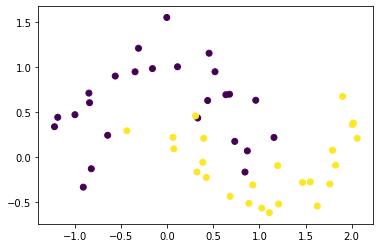

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
#c is the colour parameter, and y is an array of 1s and 0s

### Step 3 - Use Numpy to add an extra column for the bias to your input:

In [7]:
X = np.hstack([X, np.ones((X.shape[0], 1))]) # This hstack just adds an extra column!

In [8]:
X[:5]

array([[-0.15856989,  0.98480618,  1.        ],
       [ 1.10900374, -0.62160223,  1.        ],
       [ 0.39641523,  0.20740869,  1.        ],
       [ 1.79239122,  0.07511293,  1.        ],
       [-0.84739307,  0.71154296,  1.        ]])

In [9]:
X.shape

(50, 3)

- hstack does the same thing as pandas concat, horizontally attaching a column of ones to the input data, X
- we can now treat the bias as an additional input

#### np.vstack would add a row of 1s!

### Step 4 - Implement a sigmoid function that accepts NumPy arrays:
- Just a quick note to make: ANNs are actually used primarily as a *supervised learning* method (well, at least in this class)

In [10]:
def sigmoid(x):
    '''sigmoid function that accepts numpy arrays '''
    
    sig = 1 / (1 + np.e**(-x))
    
    return sig

#### And test it:

In [11]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

- if the results of our sigmoid function are within 2 decimals rounding from the expected results,then we know it's calculating correctly

#### Let's remind ourselves of what the sigmoid function actually does:

In [12]:
b = np.array([-99])
sigmoid(b)

array([1.01122149e-43])

### Step 5 - Initialize the network with random weights (for both the hidden and output layers)

We need: 

- inner weights: (3, 2)
- outer weights: (3, 1)
    - The first dimension represents the number of inputs!
    - The second dimension represents the number of neurons!

**Hint:** If we represent each layers’ weights with a numpy array, what should its shape be, given that – for example – the first layer has 3 inputs that feed 2 neurons?


In [13]:
# creating random weights
inner_weights = np.random.normal(0.0, 1.0, size=(3, 2))
outer_weights = np.random.normal(0.0, 1.0, size=(3, 1))

In [14]:
inner_weights

array([[ 0.2491557 ,  0.69894957],
       [ 0.99885573, -0.34461507],
       [-0.33067308, -0.21645169]])

In [15]:
outer_weights

array([[-1.87113825],
       [ 0.51101215],
       [-0.53039483]])

In [16]:
weights = [inner_weights, outer_weights]

In [17]:
weights[0]

array([[ 0.2491557 ,  0.69894957],
       [ 0.99885573, -0.34461507],
       [-0.33067308, -0.21645169]])

- it's really important that the weights are in this shape! i.e. the first element in the tuple (3) is the number of input weights (X1, X2, bias) 
- and the second element in the tuple (2 or 1) represents the number of neurons in the first and second layers, respectively.

### Step 6 - Implement a feed-forward function that replicates the feed-forward network illustrated in the figure above

In [18]:
def feed_forward(X, weights):
    
    # 1. calculate the dot product of X (50,3)
    # and the weights of the first layer (3, 2)
    #results in output shape of (50,2)
    
    dot_product = np.dot(X, weights[0])

    # 2. apply the sigmoid function on the result
    # applying sigmoid results of (50,2) matrix gives us (50,2)

    output1 = sigmoid(dot_product)
    
    # 3. append an extra columns of 1s for the bias to the result (see Step 3)
    # results in (50, 3) matrix
    
    hidden_X = np.hstack([output1, np.ones((output1.shape[0], 1))])
        
    # 4. calculate the dot product of the hidden output X (50,3)
    # and the weights of the second layer (3, 1) - results in (50,1)
    
    hidden_dot =  np.dot(hidden_X, weights[1])
    
    # 5. apply the sigmoid function on the result 
    # don't forget to append bias column!
    
    output2 = sigmoid(hidden_dot)
    
    #6. return all intermediate results
            
    return output1, output2

#### And test the ANN F-F function:

In [19]:
out1, out2 = feed_forward(X, weights)
assert out1.shape == (50, 2)
assert out2.shape == (50, 1)

In [20]:
Xref = np.array([[1.0, 2.0, 1.0]])
whidden = np.array([[1.0, 2.0, 0.0],
                    [-1.0, -2.0, 0.0]]).T

wout = np.array([1.0, -1.0, 0.5]).T

w = [whidden, wout]

output1, output2 = feed_forward(Xref, w)
assert np.all(output1.round(2) == np.array([[0.99, 0.01]]))
# assert np.all(output2.round(2) == np.array([0.82])

### A nice way to manually calculate the accuracy of the initial guess:
- flatten both ytrue and ypred (so that they're both (50,) arrays)
- round the ypred (either up to 1 or down to 0)
- then compare them to eachother to get a boolean array (True where the values are the same, False where they are not)
- sum the boolean array and divide by the length (i.e. take the mean)

In [21]:
def get_accuracy(ypred,ytrue):
    
    acc = sum(ytrue.flatten() == ypred.flatten().round().astype(np.int64))
    
    return acc/len(ytrue)

In [22]:
get_accuracy(out2, y)

0.5

#### 50% is our baseline - let's hope we can improve it!

## Backpropagation

So far, we have just put in random numbers and fed forward into our network. Now we will work backwards to work out the really large errors, and to establish what the weights should be!

Backpropagation is an extension of the gradient calculation in the Gradient Descent algorithms.

Like in Gradient Descent, the gradient of a loss function is used to calculate by how much to update the weigths in the layers.

The information about the gradient is then sent backwards through the network. For each layer, a separate gradient is calculated based on the gradient of the later layers.

### Step 1 -  Run your code for the Feed-Forward-Network, make sure it works

### Step 2 - Create small random weights for both layers of the network:

- create separate weights for both layers
- include the biase in the weights
- use the numpy.random functions
- to speed up training, assign weights in the range:

\begin{align}
w \approx \pm \sqrt{\frac{1}{n_{neurons}}}
\end{align}

### Step 3 - Implement a function that calculates a simple error from the output:

\begin{align}
error = \hat y - y_{true}
\end{align}
                        
In our case, our ${\hat y}$ is our second output (out2) and $y_{true}$ is the original y values from the make moons dataset! 

In [23]:
y = y.reshape(50, 1)

In [24]:
def diff_func(ypred, ytrue):
    
    diff = ypred - ytrue
    
    return diff

In [25]:
diff = diff_func(out2, y)

In [26]:
diff.shape

(50, 1)

### Step 4 - Implement a Log Loss function
\begin{align}
loss = \sum -(y_{true} * log(y_{pred}) + (1 - y_{true}) * log(1 - y{pred}))
\end{align}

The function should take the true output and a predicted probability and returns the sum of log loss values over all data points

In [27]:
def log_loss(ytrue, ypred):
    
    logloss = sum(-(ytrue * np.log(ypred) + (1-ytrue) * np.log(1-ypred)))
    
    return logloss

In [28]:
log_loss(y, out2)

array([40.08035897])

In [29]:
log_loss(y, out2).shape

(1,)

#### Test the function with an assertion:

In [30]:
ytrue = np.array([0.00, 0.00, 1.00, 1.00])
ypred = np.array([0.01, 0.99, 0.01, 0.99])
assert round(log_loss(ytrue, ypred), 2) == 9.23

In [31]:
error = diff_func(out2, y) * log_loss(y, out2)

In [32]:
error.shape

(50, 1)

In [33]:
sum(error)

array([-539.99162595])

In [34]:
def error_function(ypred, ytrue):
    
    diff = ypred - ytrue
    
    logloss = sum(-(ytrue * np.log(ypred) + (1-ytrue) * np.log(1-ypred)))

    error = diff * logloss
    
    return error

In [35]:
sum(error_function(out2, y))

array([-539.99162595])

**Note:** With a ypred of exactly 1.0 or 0.0 the log loss function will return a **NaN value**.


### Step 5 - Implement the first part of the backpropagation algorithm according to the equations:

\begin{align}\begin{aligned}\bigtriangledown_{out} = out_{hidden} \bullet error\\w_{out} \leftarrow w_{out} + \bigtriangledown_{out} * LR\end{aligned}\end{align}

Write the code that modifies the weights of the output layer:

1. Initialize the weights
2. Calculate the output of both layers for each data point
3. Calculate the error for each data point
4. Add a bias to the hidden output
5. Calculate weight modifications for the output layer by the equations above
    - Modify each weight of the output layer by `-sigmoid'(output) * loss * hidden_output`

6. Apply the weight modification for each data point separately.

#### Execute the function once. This is Step B!


In [36]:
# def backpropagationB(ypred):
    
#     gradient_y = ypred * (1 - ypred) * error
    
#     return gradient_y

In [37]:
# grad_y = backpropagationB(out2)

In [38]:
# grad_y.shape

In [39]:
# out1_with_bias = np.hstack([out1, np.ones((out1.shape[0], 1))])

In [40]:
# out1_with_bias.shape

In [41]:
# LR= 0.05

In [42]:
#this will error, need to transpose!
# delta_wo = np.dot(-grad_y, out1_with_bias) * LR

#### You're going to get an error, we need to transpose!

In [43]:
# delta_wo = np.dot(-grad_y.T, out1_with_bias) * LR

In [44]:
# delta_wo

In [45]:
# def backpropagation1(ypred):
    
#     gradient_y = ypred * (1 - ypred) * error
    
#     out1_with_bias = np.hstack([out1, np.ones((out1.shape[0], 1))])
    
#     LR = 0.05
    
#     delta_wo = np.dot(-gradient_y.T, out1_with_bias) * LR
    
#     return delta_wo

In [46]:
# backpropagation1(out2)

In [47]:
# def backpropagation1(ypred, ytrue, hidden_out, LR=0.05):
    
#     diff = ypred - ytrue
#     logloss = sum(-(ytrue * np.log(ypred) + (1-ytrue) * np.log(1-ypred)))
#     error = diff * logloss
    
#     gradient_y = ypred * (1 - ypred) * error
#     out_with_bias = np.hstack([hidden_out, np.ones((hidden_out.shape[0], 1))])
#     delta_wo = np.dot(-gradient_y.T, out1_with_bias) * LR
    
#     new_weights = weights[1] + delta_wo.T
    
#     return new_weights

In [48]:
# new_weights = [weights[0],backpropagation1(out2, y, out1)]
# new_weights

In [49]:
# new_weights = [wH_new, wO_new]

In [50]:
# new_weights[0].shape, new_weights[1].shape
# #shapes look right!!

In [51]:
def backprop(weights,output1,output2,ytrue,X_input, LR_O = 0.05, LR_H = 50):  
    #separate learning rates for outer and inner weights.
    
    wH =weights[0]
    wO =weights[1]
    
    #STEP A:
    error = (output2-ytrue.reshape(-1,1))*log_loss(ytrue.reshape(-1,1), output2) #need to reshape the y true to a (50,1)!
   
    #STEP B:
    sig_deriv = output2*(1-output2)
    y_grad = sig_deriv*error
    
    #STEP C:
    hidden_out_with_bias = np.hstack([output1,np.ones((output1.shape[0],1))])
    delta_wo = np.dot(-y_grad.T,hidden_out_with_bias)*LR_O
    wO_new = wO+delta_wo.T #old weights + delta weights -> new weights!

    #STEP D:
    sig_deriv_2 = output1 * (1-output1)
    H_grad = sig_deriv_2  * np.dot(y_grad , wO_new[:2].T) #remove the bias, since it is not backpropagated!
    
    #STEP E:
    delta_wH = np.dot(-H_grad.T,X_input)*LR_H
    wH_new = wH+delta_wH.T #old weights + delta weights -> new weights!
    
    return wH_new, wO_new

In [52]:
wH_new, wO_new = backprop(weights,out1,out2,y,X)

In [53]:
ACC_VEC = []
LOSS_VEC = []
for i in range(500):
    out1, out2 =  feed_forward(X, weights)
    ACC_VEC.append(get_accuracy(out2,y))
    LOSS_VEC.append(sum(log_loss(y, out2)))
    new_weights = backprop(weights,out1,out2,y,X)
    weights = new_weights

/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.


In [56]:
max(ACC_VEC), min(LOSS_VEC) 
#90% max accuracy!

(0.66, 28.350432483965868)

Text(0.5, 1.0, 'LOSS OVER TRAINING EPOCHS')

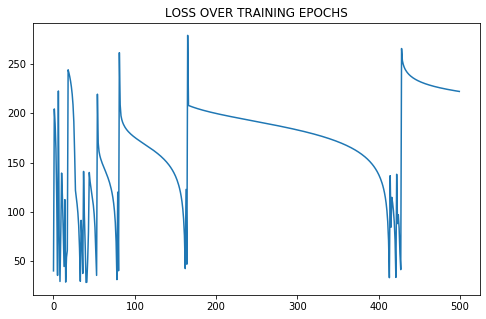

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(LOSS_VEC)
plt.title('LOSS OVER TRAINING EPOCHS')

Text(0.5, 1.0, 'ACCURACY OVER TRAINING EPOCHS')

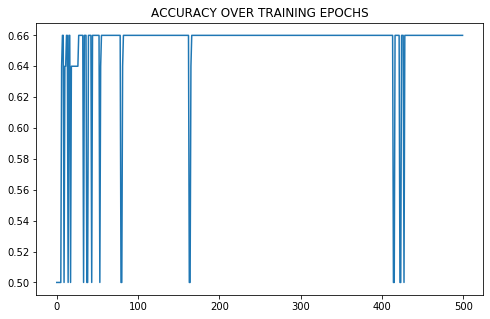

In [58]:
plt.figure(figsize=(8,5))
plt.plot(ACC_VEC)
plt.title('ACCURACY OVER TRAINING EPOCHS')

### Still a bit clunky and needs some hyperparameter optimization, but not bad for doing it from scratch.

What could we do better (in theory)?
- Better initialization method (e.g. He, Glorot, Lecun)
- Batch Normalization
- Better fine-tuning of the learning rates and epochs
- Use Keras :)

### Step 6 - Implement an optimization loop:

- Wrap steps 2-5 in a loop so that they are repeatedly applied to all data points
- print the total loss in each iteration
- stop after a predefined number of iterations
- When the loss is becoming smaller, your implementations works.

#### You must make sure that the loss is really dropping. Do not even try to continue with the second part of the backpropagation if it doesnt.

(Implement the second part of the backpropagation algorithm – propagate the output gradient to the hidden layer:

Calculate hidden_loss as sig'(output) * output_weight for each hidden neuron and each data point
Modify each weight in the hidden layer by -sigmoid'(hidden_output) * hidden_loss * input
Apply the weight modification for each data point separately.
Execute the function once.)

In [59]:
# new_out1, new_out2 = feed_forward(X, new_weights)

In [60]:
# new_out1.shape, new_out2.shape

In [61]:
# new_error = error_function(new_out2, y)

In [62]:
# sum(new_error)

Now let's put it in a looooop